# Query of Dot 311 

In [24]:
#Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) 
#complaints are open (subtract closed date from created date). Connect to the database 
#to get the data and do the analysis. Submit the code through Github and type up your 
#results in your PR

In [25]:
#Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com
#Port: 5432
#Database: training
#Username: dot_student
#Password: qgis

In [ ]:
#Very helpful when dealing with Timedeltas:
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/

In [ ]:
#For set up and Query:
#http://pythonhosted.org/pg8000/quickstart.html
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/

In [60]:
import pg8000
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
cursor.execute("select * from information_schema.columns")
results = cursor.fetchall()

In [33]:
conn.rollback()

In [34]:
results

(['training',
  'tiger',
  'loader_lookuptables',
  'process_order',
  1,
  '1000',
  'NO',
  'integer',
  None,
  None,
  32,
  2,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'training',
  'pg_catalog',
  'int4',
  None,
  None,
  None,
  None,
  '1',
  'NO',
  'NO',
  None,
  None,
  None,
  None,
  None,
  None,
  'NEVER',
  None,
  'YES'],
 ['training',
  'tiger',
  'loader_lookuptables',
  'single_mode',
  4,
  'true',
  'NO',
  'boolean',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'training',
  'pg_catalog',
  'bool',
  None,
  None,
  None,
  None,
  '4',
  'NO',
  'NO',
  None,
  None,
  None,
  None,
  None,
  None,
  'NEVER',
  None,
  'YES'],
 ['training',
  'tiger',
  'loader_lookuptables',
  'load',
  5,
  'true',
  'NO',
  'boolean',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,


In [40]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
cursor.execute("select * from information_schema.columns where table_name='dot_311'")
results = cursor.fetchall()

In [44]:
for x in results:
    print(x[3])

gid
unique_key
agency
agency nam
complaint
descriptor
location t
incident z
incident a
street nam
cross stre
cross st_1
intersecti
intersec_1
address ty
city
landmark
facility t
status
due date
resolution
resoluti_1
community
borough
x coordina
y coordina
park facil
park borou
school nam
school num
school reg
school cod
school pho
school add
school cit
school sta
school zip
school not
school or
vehicle ty
taxi compa
taxi pick
bridge hig
bridge h_1
road ramp
bridge h_2
garage lot
ferry dire
ferry term
latitude
longitude
location
geom
created_date
closed_date


In [45]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
cursor.execute("SELECT created_date, closed_date from dot_311")
results = cursor.fetchall()

In [130]:
#Prepping the data for the list
results_list = []
for y in results:
    results_list.append(y)

In [131]:
#Creating the dataframe
df = pd.DataFrame(results_list)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 2 columns):
0    5851 non-null datetime64[ns]
1    5650 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 91.5 KB


In [133]:
#Renaming the columns
df.columns = ['Open', 'Closed']

In [134]:
df['Difference'] = df['Closed'] - df['Open']

In [135]:
df_delta = df[df['Difference'] >= pd.Timedelta(seconds=1)].dropna()

In [113]:
df.index = df['Difference']

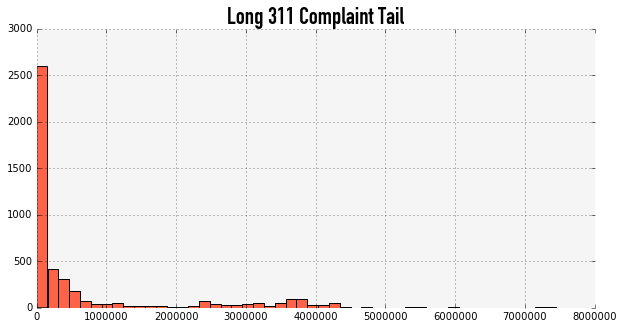

In [152]:
csfont = {'fontname':'DIN Condensed'}

fig, ax = plt.subplots(figsize =(10,5), facecolor='white')


(df_delta['Difference'] / pd.Timedelta(seconds=1)).hist(bins=50, color='tomato', ax=ax)

ax.set_axis_bgcolor("WhiteSmoke")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Long 311 Complaint Tail", **csfont, fontsize=24)


In [ ]:
#Very helpful when dealing with Timedeltas:
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/